In [335]:
import pandas as pd
import numpy as np
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split as split
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

In [255]:
df = pd.read_csv(r"C:\Users\Administrator\Desktop\Prodigy InfoTech\Task-04\twitter.csv")
df.columns = ["id", "Brand", "Sentiment", "Comment"]
df.drop(columns = "id", inplace = True)
df

,Brand,Sentiment,Comment
0,Borderlands,Positive,I am coming to the borders and I will kill you...
1,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,Borderlands,Positive,im coming on borderlands and i will murder you...
3,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...
74676,Nvidia,Positive,Just realized that the Windows partition of my...
74677,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,Nvidia,Positive,Just realized between the windows partition of...


In [257]:
df.dropna(inplace = True)

In [287]:
senti_count = df.groupby("Sentiment").count()
senti_count.drop(columns = "Comment", inplace = True)
senti_count.reset_index(inplace = True)

In [289]:
senti_count

,Sentiment,Brand
0,Irrelevant,12875
1,Negative,22358
2,Neutral,18108
3,Positive,20654


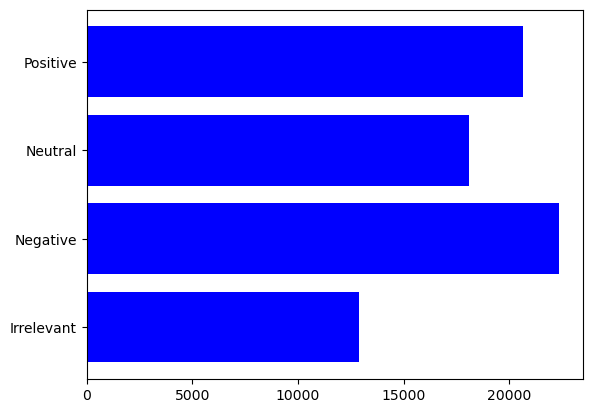

In [303]:
plt.barh(senti_count.Sentiment, senti_count.Brand, color = "blue")
plt.show()

In [333]:
brand_count = df.groupby(["Sentiment", "Brand"]).count()
brand_count.sort_values(by = ["Sentiment", "Comment"], ascending = False)

Comment
Sentiment  Brand                                     
Positive   AssassinsCreed                        1439
           Borderlands                           1016
           Cyberpunk2077                          950
           PlayStation5(PS5)                      936
           RedDeadRedemption(RDR)                 927
           CallOfDutyBlackopsColdWar              856
           Hearthstone                            833
           Nvidia                                 802
           Xbox(Xseries)                          785
           HomeDepot                              772
           CS-GO                                  760
           WorldOfCraft                           737
           Overwatch                              726
           ApexLegends                            634
           GrandTheftAuto(GTA)                    621
           LeagueOfLegends                        615
           TomClancysGhostRecon                   614
           Microsoft                              602
           Battlefield                            586
           Dota2                                  579
           Fortnite                               553
           Verizon                                528
           TomClancysRainbowSix                   513
           FIFA                                   495
           CallOfDuty                             446
           NBA2K                                  424
           PlayerUnknownsBattlegrounds(PUBG)      398
           MaddenNFL                              396
           Google                                 360
           Amazon                                 308
           johnson&johnson                        269
           Facebook                               174
Neutral    Amazon                                1207
           WorldOfCraft                          1064
           johnson&johnson                       1013
           ApexLegends                            936
           Nvidia                                 863
           Microsoft                              825
           LeagueOfLegends                        818
           Google                                 808
           RedDeadRedemption(RDR)                 807
           TomClancysGhostRecon                   789
           Facebook                               786
           Hearthstone                            698
           TomClancysRainbowSix                   640
           Borderlands                            597
           Dota2                                  588
           Verizon                                565
           CS-GO                                  548
           PlayStation5(PS5)                      507
           Cyberpunk2077                          462
           Xbox(Xseries)                          411
           CallOfDuty                             375
           CallOfDutyBlackopsColdWar              352
           Battlefield                            351
           HomeDepot                              335
           GrandTheftAuto(GTA)                    317
           Overwatch                              296
           NBA2K                                  270
           PlayerUnknownsBattlegrounds(PUBG)      263
           MaddenNFL                              197
           Fortnite                               162
           AssassinsCreed                         156
           FIFA                                   102
Negative   MaddenNFL                             1694
           NBA2K                                 1469
           FIFA                                  1169
           TomClancysRainbowSix                  1115
           Verizon                               1092
           TomClancysGhostRecon                   894
           HomeDepot                              892
           CallOfDuty                             883
           johnson&johnson                        

In [331]:
pd.set_option("display.max_rows", 150)

In [134]:
df["Brand_label"] = LabelEncoder().fit_transform(df.Brand)
df["Senti_label"] = LabelEncoder().fit_transform(df.Sentiment)

In [208]:
X = df[["Comment", "Brand_label"]]
y = df.Senti_label

In [222]:
df

,Brand,Sentiment,Comment,Brand_label,Senti_label
0,Borderlands,Positive,I am coming to the borders and I will kill you...,4,3
1,Borderlands,Positive,im getting on borderlands and i will kill you ...,4,3
2,Borderlands,Positive,im coming on borderlands and i will murder you...,4,3
3,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,4,3
4,Borderlands,Positive,im getting into borderlands and i can murder y...,4,3
...,...,...,...,...,...
74676,Nvidia,Positive,Just realized that the Windows partition of my...,21,3
74677,Nvidia,Positive,Just realized that my Mac window partition is ...,21,3
74678,Nvidia,Positive,Just realized the windows partition of my Mac ...,21,3
74679,Nvidia,Positive,Just realized between the windows partition of...,21,3


In [206]:
preprocessor = ColumnTransformer(
    transformers=[
        ('text', CountVectorizer(), "Comment"),
        ('num', 'passthrough', ['Brand_label'])
   
    ])

model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor), 
    ('classifier', MultinomialNB()) 
])

In [210]:
model_pipeline.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('text', CountVectorizer(),
                                                  'Comment'),
                                                 ('num', 'passthrough',
                                                  ['Brand_label'])])),
                ('classifier', MultinomialNB())])

In [216]:
df_test = pd.read_csv(r"C:\Users\Administrator\Desktop\Prodigy InfoTech\Task-04\twitter_validation.csv")
df_test.columns = ["id", "Brand", "Sentiment", "Comment"]
df_test.drop(columns = "id", inplace = True)
df_test

,Brand,Sentiment,Comment
0,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,Google,Neutral,Now the President is slapping Americans in the...
4,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...
994,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [224]:
df_test["Brand_label"] = LabelEncoder().fit_transform(df_test.Brand)
df_test["Senti_label"] = LabelEncoder().fit_transform(df_test.Sentiment)
df_test

,Brand,Sentiment,Comment,Brand_label,Senti_label
0,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...,0,2
1,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...,19,1
2,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,...",5,1
3,Google,Neutral,Now the President is slapping Americans in the...,13,2
4,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...,10,1
...,...,...,...,...,...
994,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...,14,0
995,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...,5,0
996,Borderlands,Positive,Today sucked so it’s time to drink wine n play...,4,3
997,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.,19,3


In [230]:
X_test = df_test[["Comment", "Brand_label"]]
y_test = df_test.Senti_label

In [232]:
model_pipeline.score(X_test, y_test)

0.8158158158158159

In [238]:
y_pred = model_pipeline.predict(X_test)

In [240]:
confusion_matrix(y_pred, y_test)

array([[118,   1,  11,   4],
       [ 25, 231,  31,  13],
       [  6,  10, 214,   8],
       [ 22,  24,  29, 252]], dtype=int64)

In [337]:
with open("Task-04", "wb") as f:
    pickle.dump(model_pipeline, f)